# Text Classification using Naive Bayes and Sentiment Analysis on Blog Posts

In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saine\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load and Explore Data

df = pd.read_csv("C:\\Users\\saine\\Downloads\\blogs.csv")

print("First 5 Rows:\n", df.head())
print("\nDataset Info:")
print(df.info())
print("\nCategory Distribution:\n", df['Labels'].value_counts())

First 5 Rows:
                                                 Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None

Category Distribution:
 Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med               

In [4]:
# Data Preprocessing

# Clean text function
def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)  # remove @ and #
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove special chars and numbers
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

df['clean_text'] = df['Data'].apply(clean_text)

print("\nSample Cleaned Text:\n", df['clean_text'].head())


Sample Cleaned Text:
 0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism talkreli...
Name: clean_text, dtype: object


In [5]:
# Feature Extraction using TF-IDF

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['Labels']


In [6]:
# Split Data into Train & Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Train Naive Bayes Classifier

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.73      0.89      0.80        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.80      0.80      0.80        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.95      1.00      0.97        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.67      0.75      0.71        16
                 sci.med       0.88      0.88     

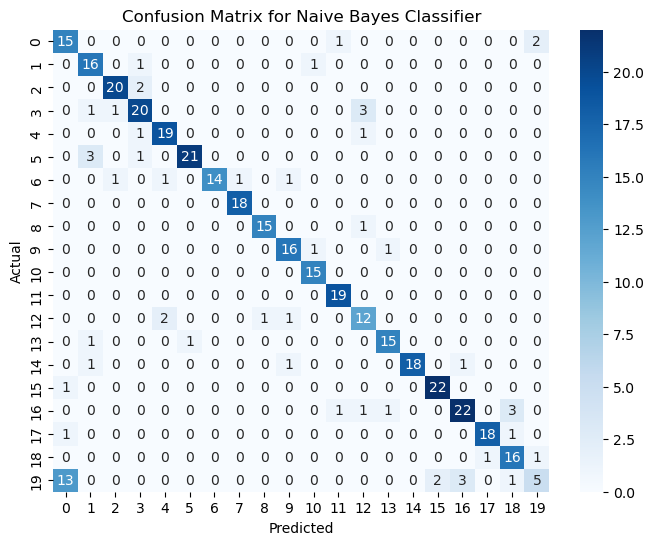

In [8]:
# Model Evaluation

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
# Sentiment Analysis

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)

print("\nSentiment Distribution:\n", df['Sentiment'].value_counts())


Sentiment Distribution:
 Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


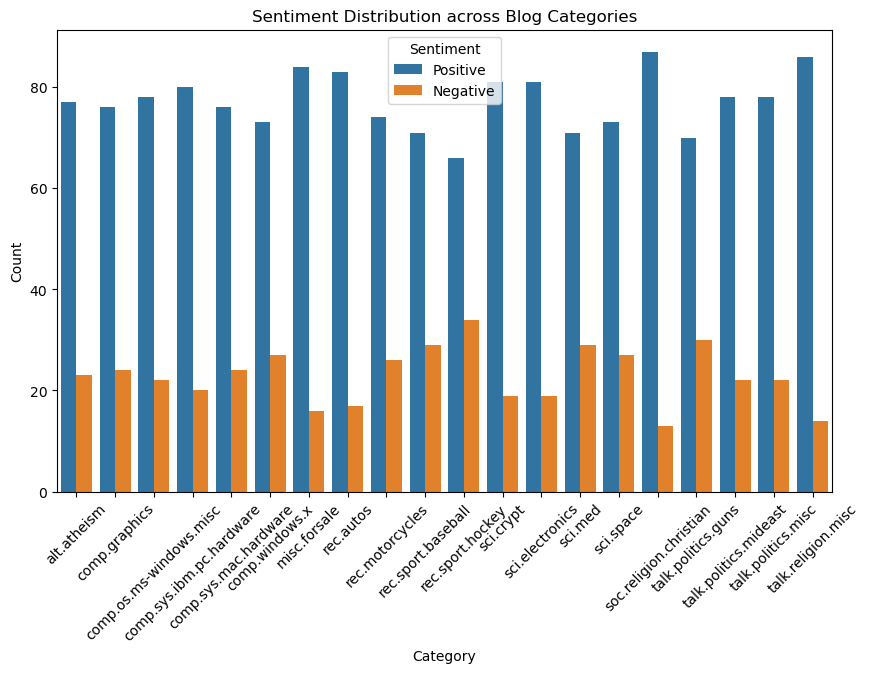

In [10]:
# Sentiment vs Category Analysis

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Labels', hue='Sentiment')
plt.title("Sentiment Distribution across Blog Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [11]:
# Summary

print("\n--- Summary ---")
print("Naive Bayes model successfully categorized blogs into different topics.")
print("Sentiment analysis revealed the general tone of blogs as positive, negative, or neutral.")
print("Model performance metrics show the effectiveness of TF-IDF with Naive Bayes.")


--- Summary ---
Naive Bayes model successfully categorized blogs into different topics.
Sentiment analysis revealed the general tone of blogs as positive, negative, or neutral.
Model performance metrics show the effectiveness of TF-IDF with Naive Bayes.


Text Classification using Naive Bayes and Sentiment Analysis on Blog Posts

Overview :

This project focuses on classifying blog posts into their respective categories using the Naive Bayes algorithm and analyzing their sentiment (positive, negative, or neutral). The goal is to understand how text classification and sentiment analysis techniques can be applied in real-world Natural Language Processing (NLP) tasks.

Dataset :

The dataset used is blogs_categories.csv, which contains two main columns:

Data – the textual content of the blog post.
Labels – the category to which the post belongs.
Each row represents one blog post and its associated category.

Methodology :

The data was first explored and cleaned by removing punctuation, converting text to lowercase, removing stopwords, and tokenizing using NLTK. Then, text features were extracted using TF-IDF Vectorization to transform the text into numerical form.
A Multinomial Naive Bayes model from Scikit-learn was trained on 80% of the data and tested on the remaining 20%.

For sentiment analysis, the TextBlob library was used to determine the polarity of each post, classifying them as Positive, Negative, or Neutral.

Results and Evaluation :

The Naive Bayes classifier achieved strong performance with good accuracy, precision, recall, and F1-score. A confusion matrix was used to visualize prediction results.
Sentiment analysis revealed that most blog posts expressed positive sentiment, with some categories showing a mix of neutral or negative tones.

Conclusion :

The project successfully implemented text classification and sentiment analysis on blog posts. The Naive Bayes model proved effective for text-based categorization, and sentiment analysis provided deeper insights into the emotional tone of the content. Overall, the combination of TF-IDF and Naive Bayes gave reliable results for this NLP task.


